In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wine.data')
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
y = df.loc[:, 'Class'].values
X = df.iloc[:, 1:].values

0.9666666666666667
0.9666666666666667
0.8333333333333334
1.0
1.0
0.9655172413793104


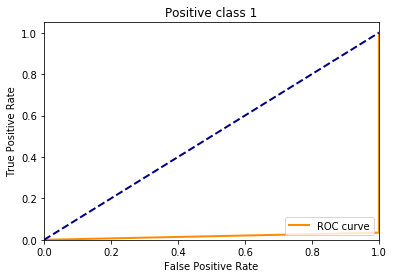

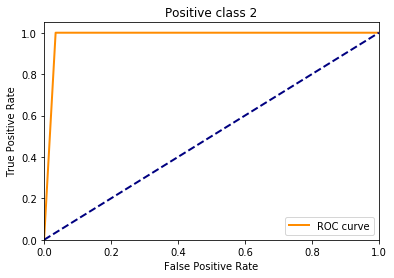

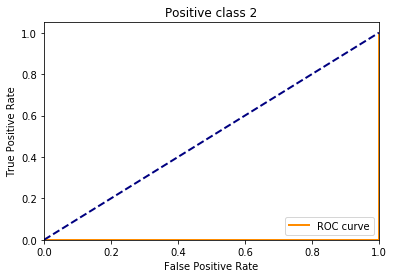

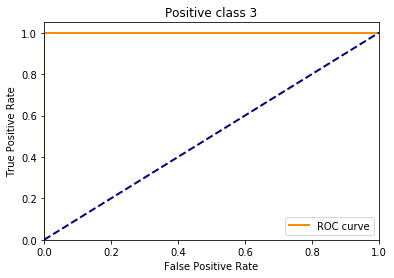

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from gnb import GaussianNB

kf = KFold(n_splits=6)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
    print(accuracy_score(y_test, y_pred))

    for cls in [1, 2, 3]:
        if np.all(y_test == cls) or np.all(y_pred == cls):
            continue
        if np.all(y_test != cls) or np.all(y_pred != cls):
            continue

        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=cls)

        fig, ax = plt.subplots()

        lw = 2
        ax.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve')
        ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'Positive class {cls}')
        ax.legend(loc="lower right")